Predict student marks based on age.


In [76]:
import pandas as pd
dataset = pd.read_csv("Student.csv")
dataset.head()

,Name,Roll No,Age,Marks
0,Zaid,1,19.0,65.0
1,Zaki,2,20.0,70.1
2,Priya,3,20.0,70.2
3,Rahul,4,21.0,65.0
4,Neha,5,19.0,65.1


In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     15 non-null     object 
 1   Roll No  15 non-null     int64  
 2   Age      13 non-null     float64
 3   Marks    15 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 608.0+ bytes


In [69]:
dataset.isnull().sum()

Name       0
Roll No    0
Age        2
Marks      0
dtype: int64

The dataset contains student Name, Roll No., Age and Marks. Missing values are present and will be handled before modeling.


In [77]:
dataset["Age"] = dataset["Age"].fillna(dataset["Age"].mean())
dataset.isnull().sum()

Name       0
Roll No    0
Age        0
Marks      0
dtype: int64

Missing numerical values were filled using the mean to preserve dataset size.


In [78]:
x = dataset[["Age"]]
y = dataset["Marks"]

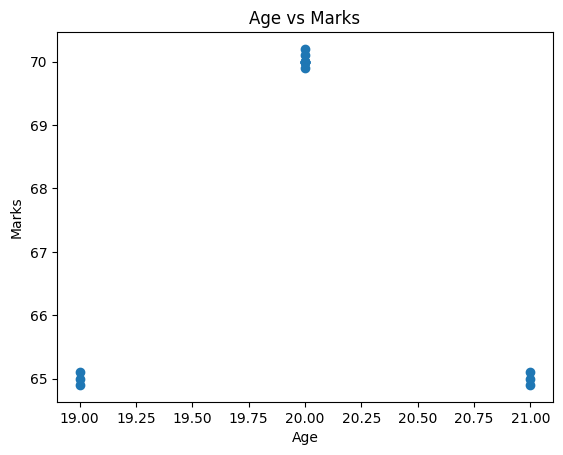

In [72]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.xlabel("Age")
plt.ylabel("Marks")
plt.title("Age vs Marks")
plt.show()

The scatter plot shows a non-linear relationship between age and marks.

A linear model may not capture this pattern effectively.


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [74]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(x_test)
print("mean square error: \n", mean_squared_error(y_test,y_pred))
print("R2 score: \n", r2_score(y_test,y_pred))

mean square error: 
 0.0005442176870752322
R2 score: 
 0.9999020408163265


/home/mohammad/miniconda3/envs/mldl/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


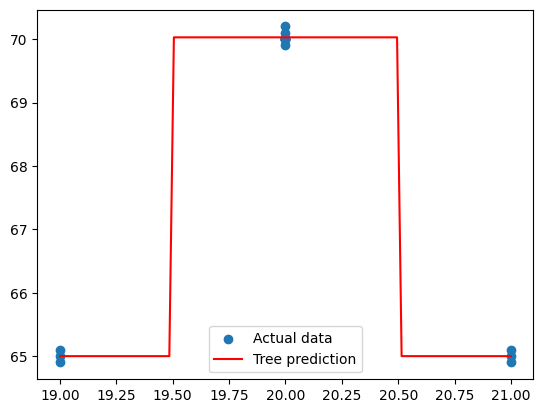

In [75]:
import numpy as np

X_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_range_pred = model.predict(X_range)

plt.scatter(x, y, label="Actual data")
plt.plot(X_range, y_range_pred, color="red", label="Tree prediction")
plt.legend()
plt.show()


Decision Tree Regression performs better on this dataset because it can model non-linear relationships.

This results in improved prediction accuracy compared to linear regression.


Conclusion:

For non-linear data patterns, tree-based models are more suitable than linear models.

Model selection should be guided by EDA rather than default choices.
